In [ ]:
Data Science Project

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from random import randint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

In [3]:
#load the dataset
file = "\\Users\\Lawrence Swen Tuah\\Downloads\\fetal_health.csv"
mydata = pd.read_csv(file)

In [ ]:
# Examine the shape and head of the Data...
mydata.head()
print(mydata.shape)
print(mydata.columns)

In [ ]:
# Examine the shape and head of the Data...
mydata.info()

In [5]:
# Check for missing values and null value in the data
any(mydata.isna().any())

False

In [ ]:
# If any missing values, find the proporting of missing values 
# Fourtunately, this is a real stduy data that is properly cleaned and processed.. 
missing_percentage = (mydata.isna().sum() / len(mydata)) * 100
print(missing_percentage)

In [8]:
# Examine the values count of the target variable...
mydata['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [9]:
# Get the target variable
mydataX = mydata.drop(columns=["fetal_health"])
mydataY = mydata["fetal_health"]
print(mydataX.shape, mydataY.shape)

mydataY.value_counts()

(2126, 21) (2126,)


fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [ ]:
# Standardize the features of X with a mean of 0 and an sd of 1... 
# This ensures that all features are weighted on the same skills... 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mydata_scaled = pd.DataFrame(scaler.fit_transform(mydataX), columns=mydataX.columns)
mydata_scaled

In [ ]:
# draw a correlation matrix between the features to examin relationships... 
correlation_matrix = mydata_scaled.corr().round(3)
correlation_matrix

In [ ]:
# Plot the correlation matrix between the features to examin relationships... 
sns.set(style="white")  # Optional styling
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu", fmt=".2f")

# Show the plot
plt.title("Correlation Plot")
plt.show()


In [13]:
# Split the data using Hold-out method.  Stratify the data to ensure equal proportion  for both the training and test set.. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mydata_scaled, mydataY, stratify=mydataY, test_size=0.3, random_state=42)

In [ ]:
# Train a baseline model using dummy classfier.. This is a simple model that will be used to test the need for further complex model.. 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
baseline = DummyClassifier(strategy="stratified").fit(X_train, y_train)
y_pred = baseline.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred)
confu_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(baseline_accuracy)
print(confu_matrix)


#Note.. The baseline model perform poorly on the classes that are
# underrepresented thus showing the impact of class imbalance on model fit 

#Before going any further, it is good note in the case of class imbalanace,
#accuracy is not a good measure of model-fit as it tends to give more weight 
# to the most popular class.. 
# Insteand, Recall, precision and F1 score tend to be more appreciated in this case...

In [54]:
Dummy = accuracy_score(y_test, y_pred,)
Precision_DU = precision_score(y_test, y_pred, average='weighted')
Recall_DU = recall_score(y_test, y_pred, average='weighted')
F1_DU = f1_score(y_test, y_pred, average='weighted')
Classification_Report_DU = classification_report(y_test, y_pred)

#
#These weighted scores of Precision, Recall and give a fair appreciation of the model performance 
print("Evaulation Metrics of Random Forest:")
print(f"Accuracy_DU: {round(Dummy, 3)}, Precision_DU: {round(Precision_DU, 2)}, Recall_DU: {round(Recall_DU, 2)},\
F1_Score_DU:{round(F1_DU, 2)}")
print("Classification Report:")
print(Classification_Report_DU)

Evaulation Metrics of Random Forest:
Accuracy_DU: 0.638, Precision_DU: 0.63, Recall_DU: 0.64,F1_Score_DU:0.63
Classification Report:
              precision    recall  f1-score   support

         1.0       0.78      0.79      0.78       497
         2.0       0.13      0.14      0.14        88
         3.0       0.07      0.06      0.06        53

    accuracy                           0.64       638
   macro avg       0.33      0.33      0.33       638
weighted avg       0.63      0.64      0.63       638



In [36]:
# Train the first model using decision trees and with hyperparameter tuning and random search to select the optimal model.. 4
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


# jsut for curiosity, you copuld choose to calculate the time for the model to run so as to make
# a comparison between random search and grid search
# Prepare the hyperparmter value

start_time = time.time()
param_dist = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 3, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}



# Estimate the model
model = DecisionTreeClassifier()

random_search= RandomizedSearchCV(estimator=model, param_distributions= param_dist, cv= randint(3, 9), n_iter=5, random_state=42)
random_search.fit(X_train, y_train)


best_model = random_search.best_estimator_

y_predict = best_model.predict(X_test)
accuracy = round(accuracy_score(y_test, y_predict), 2)

confu_matrix = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=best_model.classes_)

end_time = time.time() 
elasped_time = end_time - start_time
print("Best Hyperparameters:", random_search.best_params_)
print()
print("Accuracy:", accuracy)
print()
class_report = classification_report(y_test, y_predict, output_dict=True)
myreport = pd.DataFrame(class_report).transpose()
print(myreport)

print(confu_matrix)
print(elasped_time)


# While Decison tree perform better then dummy classfier, it stills suffers from significant class imbalanced

Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'log_loss', 'class_weight': None}

Accuracy: 0.9

              precision    recall  f1-score     support
1.0            0.914934  0.973843  0.943470  497.000000
2.0            0.809524  0.579545  0.675497   88.000000
3.0            0.869565  0.754717  0.808081   53.000000
accuracy       0.901254  0.901254  0.901254    0.901254
macro avg      0.864674  0.769368  0.809016  638.000000
weighted avg   0.896626  0.901254  0.895261  638.000000
[[484   9   4]
 [ 35  51   2]
 [ 10   3  40]]
0.3731067180633545


In [39]:
#Print the Evaluation Metrics of the Decision Tree Classifier

random.seed(42)
np.random.seed(42)

DT = accuracy_score(y_test, y_predict,)
Precision_DT = precision_score(y_test, y_predict, average='weighted')
Recall_DT = recall_score(y_test, y_predict, average='weighted')
F1_DT = f1_score(y_test, y_predict, average='weighted')
Classification_Report_DT = classification_report(y_test, y_predict)

#These weighted scores of Precision, Recall and give a fair appreciation of the model performance 
print("Evaulation Metrics of Random Forest:")
print(f"Accuracy_DT: {round(DT, 3)}, Precision: {round(Precision_DT, 2)}, Recall: {round(Recall_DT, 2)},\
F1_Score_DT:{round(F1_DT, 2)}")
print("Classification Report:")
print(Classification_Report_DT)

Evaulation Metrics of Random Forest:
Accuracy_DT: 0.901, Precision: 0.9, Recall: 0.9,F1_Score_DT:0.9
Classification Report:
              precision    recall  f1-score   support

         1.0       0.91      0.97      0.94       497
         2.0       0.81      0.58      0.68        88
         3.0       0.87      0.75      0.81        53

    accuracy                           0.90       638
   macro avg       0.86      0.77      0.81       638
weighted avg       0.90      0.90      0.90       638



In [32]:
# Train the second model using K-nearst neighbors and with hyerparameter tuning and random search to select the optimal model.. 4
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
# Define the hyperparameters and their possible values 

random.seed(42)
np.random.seed(42)

start_time = time.time()
param_dist={'n_neighbors': [1,3,5, 7, 8, 9,11],
                         'weights': ['uniform', 'distance']}

model_2= KNeighborsClassifier()

random_search_2 = RandomizedSearchCV(estimator=model_2, param_distributions= param_dist, cv=randint(3, 9), random_state=42)
random_search_2.fit(X_train, y_train) 
best_model_2 = random_search_2.best_estimator_

y_predict_2 = best_model_2.predict(X_test)
accuracy_2 = round(accuracy_score(y_test, y_predict_2), 3)
# Print the best hyperparameters
end_time = time.time() 
elasped_time = end_time - start_time
print("Best Hyperparameters:", random_search_2.best_params_)
print()
print("Accuracy:", accuracy_2)
print()
class_report_2 = classification_report(y_test, y_predict_2, output_dict=True)
myreport_2 = pd.DataFrame(class_report_2).transpose()
print(myreport_2)
print(elasped_time)
# Decison tree seems to perform better than KNN...

Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 5}

Accuracy: 0.897

              precision    recall  f1-score     support
1.0            0.926782  0.967807  0.946850  497.000000
2.0            0.679487  0.602273  0.638554   88.000000
3.0            0.926829  0.716981  0.808511   53.000000
accuracy       0.896552  0.896552  0.896552    0.896552
macro avg      0.844366  0.762354  0.797972  638.000000
weighted avg   0.892677  0.896552  0.892835  638.000000
1.3493845462799072


In [35]:
#Print the Evaluation Metrics of the KNN Classfier

random.seed(42)
np.random.seed(42)

KNN = accuracy_score(y_test, y_predict_2,)
Precision_KNN = precision_score(y_test, y_predict_2, average='weighted')
Recall_KNN = recall_score(y_test, y_predict_2, average='weighted')
F1_KNN = f1_score(y_test, y_predict_2, average='weighted')
Classification_Report_KNN = classification_report(y_test, y_predict_2)

#These weighted scores of Precision, Recall and give a fair appreciation of the model performance 
print("Evaulation Metrics of KNN:")
print(f"Accuracy_KNN: {round(KNN, 3)}, Precision_KNN: {round(Precision_KNN, 2)}, Recall_KNN: {round(Recall_KNN, 2)},\
F1_Score:{round(F1_KNN, 2)}")
print("Classification Report:")
print(Classification_Report)

Evaulation Metrics of KNN:
Accuracy_KNN: 0.897, Precision_KNN: 0.89, Recall_KNN: 0.9,F1_Score:0.89
Classification Report:
              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95       497
         2.0       0.68      0.60      0.64        88
         3.0       0.93      0.72      0.81        53

    accuracy                           0.90       638
   macro avg       0.84      0.76      0.80       638
weighted avg       0.89      0.90      0.89       638



In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
random.seed(42)
np.random.seed(42)

# Define the hyperparameters and their possible values 
param_dist = {'n_estimators': [10, 50, 100],
              'max_features': [None,'sqrt', 'log2'], 'criterion': ['gini','entropy'],
             'bootstrap': [True, False],
              'class_weight': [None, 'balanced', 'balanced_subsample']}


# Create the model you want to tune
model_3 = RandomForestClassifier(random_state=42)

# Create a grid search object
random_forest_3 = RandomizedSearchCV(estimator=model_3, param_distributions=param_dist, cv=randint(3, 9), n_iter = 10, random_state=42)

# Fit the grid search to your data
random_forest_3.fit(X_train, y_train)  # Replace X and y with your data
best_model_3 = random_forest_3.best_estimator_

y_predict_3 = best_model_3.predict(X_test)
accuracy_3 = round(accuracy_score(y_test, y_predict_3), 3)
# Print the best hyperparameters

end_time = time.time() 
elasped_time = end_time - start_time
print(elasped_time)
print("Best Hyperparameters:", random_forest_3.best_params_)
print("Best performance:", random_forest_3.best_score_)
class_report_3 = classification_report(y_test, y_predict_3, output_dict=True)
myreport_3 = pd.DataFrame(class_report_3).transpose()


#The Randorm Forest with boostsrap perform well compare to all the other model and
#even did extremly well in handling the imbalanced in the data..

325.99582719802856
Best Hyperparameters: {'n_estimators': 50, 'max_features': 'sqrt', 'criterion': 'entropy', 'class_weight': None, 'bootstrap': False}
Best performance: 0.948252688172043


In [31]:
#Print the Evaluation Metrics of the Randorm Forest Classifier

random.seed(42)
np.random.seed(42)

Random_Forest = accuracy_score(y_test, y_predict_3,)
Precision = precision_score(y_test, y_predict_3, average='weighted')
Recall = recall_score(y_test, y_predict_3, average='weighted')
F1 = f1_score(y_test, y_predict_3, average='weighted')
Classification_Report = classification_report(y_test, y_predict_3)

#These weighted scores of Precision, Recall and give a fair appreciation of the model performance 
print("Evaulation Metrics of Random Forest:")
print(f"Accuracy: {round(Random_Forest, 3)}, Precision: {round(Precision, 2)}, Recall: {round(Recall, 2)},\
F1_Score:{round(F1, 2)}")
print("Classification Report:")
print(Classification_Report)

Evaulation Metrics of Random Forest:
Accuracy: 0.937, Precision: 0.94, Recall: 0.94,F1_Score:0.94
Classification Report:
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       497
         2.0       0.86      0.74      0.79        88
         3.0       0.90      0.89      0.90        53

    accuracy                           0.94       638
   macro avg       0.90      0.87      0.88       638
weighted avg       0.94      0.94      0.94       638



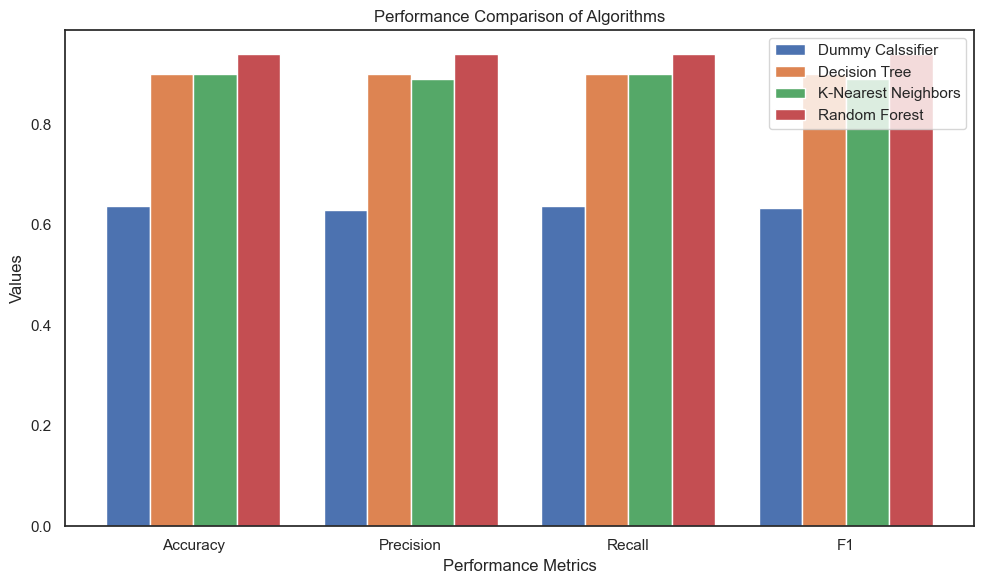

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the Performance Metrices of the Models of All the models so and see clearly which one stand out... 
data = {
    "Dummy Calssifier": [Dummy, Precision_DU, Recall_DU, F1_DU],
    "Decision Tree": [DT, Precision_DT, Recall_DT, F1_DT],
    "K-Nearest Neighbors": [KNN, Precision_KNN, Recall_KNN, F1_KNN],
    "Random Forest": [Random_Forest, Precision, Recall, F1]
}

metrics = ["Accuracy", "Precision", "Recall", "F1"]

# Convert data to plot
algorithms = list(data.keys())
values = np.array(list(data.values()))

# Bar properties
bar_width = 0.2
x = np.arange(len(metrics))

# Plot the bars
fig, ax = plt.subplots(figsize=(10, 6))
for i, algorithm in enumerate(algorithms):
    ax.bar(x + i * bar_width, values[i], width=bar_width, label=algorithm)

# Customize the chart
ax.set_xlabel("Performance Metrices")
ax.set_ylabel("Values")
ax.set_title("Performance Comparison of Algorithms")
ax.set_xticks(x + bar_width * (len(algorithms) - 1) / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()


#From this plot, it can be seen clearly that Randomforest Perform Better accross almost all index metrices..


C:\Users\Lawrence Swen Tuah\AppData\Local\Temp\ipykernel_57424\3975915021.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(mydata.columns)[sorted_idx])


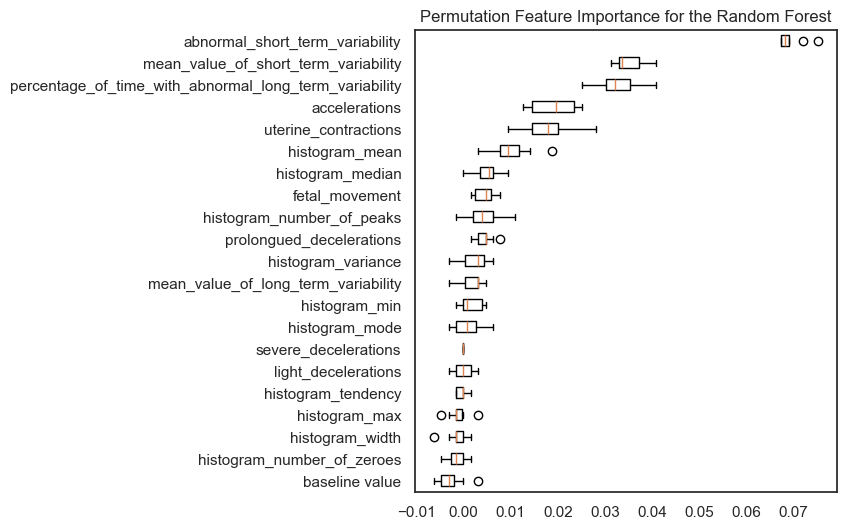

In [70]:
# The Data we worked with have many dimensions. 
# One area of interest in machine learning is to derive some form of expliantions from the model..
# We may want to know which of these features contrubute mostly to the model performance.. 
# for this task, We will use Pertmutation Feature Importance.. 
# This involuve randomly shuffling features and seeing how the model changes 

seed=22
from sklearn.inspection import permutation_importance
#now we compute the permutation feature importance using the test set for the random forest
result = permutation_importance(random_forest_3, X_test, y_test, n_repeats=10, random_state=seed)
sorted_idx = result.importances_mean.argsort()

# in the second subplot we will visualize the permutation feature importance in a box plot 
# (since we repeated the process 10 times, for accounting for the randomness of the shuffling)
plt.figure(figsize=(12, 6)) 
plt.subplot(1,2,1)
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(mydata.columns)[sorted_idx])
plt.title("Permutation Feature Importance for the Random Forest")
fig.tight_layout()
plt.show()

# this plot helps us garner some form of transparancy from the model
# and also help dicisions makers know when to make critical decision or act based on the model outcome.. 

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(rf_acc)

              precision    recall  f1-score   support

         1.0       0.94      0.97      0.95       497
         2.0       0.77      0.67      0.72        88
         3.0       0.88      0.85      0.87        53

    accuracy                           0.92       638
   macro avg       0.86      0.83      0.84       638
weighted avg       0.91      0.92      0.91       638

0.9153605015673981


In [ ]:
mydata['fetal_health'].value_counts().plot(kind='bar')
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger class')
plt.ylabel('Count')

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()